# <font color = black> Neural Network Implementation: </font>


### Background

This project involves predicting something that is somewhat of a “holy grail” of business intelligence: trying to predict whether or not a customer will eventually make a purchase using while using an online shopping portal, based on the pattern of pages they have visited on the website, certain analytical features, the time of week and year, and other features. 

The data file we’ve been given is a selection of a much larger data set: it consists of 3816 data examples and 17 features; the output variable is the last (18th) column of the file labelled “Revenue” and represents whether or not a customer eventually made a purchase (0 – purchase made  / 1 – purchase not made).

### What are Neural Networks?


A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. 

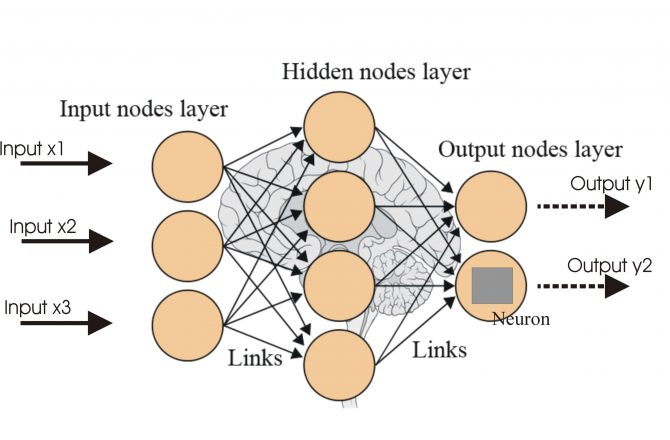

A neural network works similarly to the human brain’s neural network. A ```neuron``` in a neural network is a mathematical function that collects and classifies information according to a specific architecture. 

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a ```multi-layered perceptron (MLP)```, perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. For instance, the patterns  for this project comprise a list of quantities for online purchasing indicators for a online website; potential outputs are either "__purchase made__" or "__purchase not made__"

In [1]:
import numpy as np
from IPython.display import display,HTML
from numpy import *

np.set_printoptions(suppress=True)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

We will begin with Importting our Training data whcih will be used to train our Neural Networks, and perform predictions on our Cross-Vaidation data set. Which will be used to optimize and select the most suitable Neural Network model for our project.

In [2]:
### Importing some useful packages
#This ensures that plots appear in the sheet and not in a new window
%matplotlib inline 

#Pandas is an alternative numerical processing library like numpy: they have differences
#We will use Pandas only to provide a preview of the data once we've read it in
import pandas as pd

data = loadtxt('group6_train.dat')
column_labels = ['','# Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']
CV = loadtxt('group6_CV.dat')
display(pd.DataFrame(data,columns = column_labels).head(10))


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend,Revenue
0,5.0,1415.0,0.0,0.0,34.0,588.0,0.0,0.0,8.0,0.0,8.0,2.0,5.0,1.0,1.0,2.0,0.0,1.0
1,2.0,28.0,0.0,0.0,73.0,2260.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,7.0,4.0,2.0,1.0,0.0
2,6.0,149.0,3.0,267.0,120.0,3934.0,0.0,0.0,8.0,0.0,11.0,2.0,2.0,4.0,2.0,2.0,1.0,0.0
3,8.0,97.0,0.0,0.0,24.0,498.0,0.0,0.0,5.0,0.0,10.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0
4,2.0,21.0,1.0,802.0,48.0,2073.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,3.0,2.0,2.0,1.0,0.0
5,4.0,24.0,0.0,0.0,29.0,749.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,3.0,2.0,2.0,0.0,1.0
6,0.0,0.0,0.0,0.0,20.0,1117.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,7.0,2.0,2.0,0.0,0.0
7,1.0,75.0,0.0,0.0,20.0,1173.0,0.0,0.0,21.0,0.0,11.0,3.0,2.0,8.0,11.0,2.0,0.0,1.0
8,2.0,6.0,0.0,0.0,9.0,89.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,4.0,4.0,2.0,1.0,1.0
9,4.0,206.0,0.0,0.0,9.0,113.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,1.0,6.0,2.0,0.0,0.0


I divided my training data into X and y which represents my features and the results respectively. Siimilarly, I've divided my CV data into tX and ty respectively which will be used later in this notebook for testing purposes.

In [3]:

#Set X and y
X = data[:,:17]
y = data[:,17]

#Set tX and ty
tX = CV[:,:17]
ty = CV[:,17]

print("\nX:")
display(pd.DataFrame(X,columns = column_labels[:17]).head(10))

print("\ny:")
display(pd.DataFrame(y, columns =column_labels[17:]).head(10))



X:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,5.0,1415.0,0.0,0.0,34.0,588.0,0.0,0.0,8.0,0.0,8.0,2.0,5.0,1.0,1.0,2.0,0.0
1,2.0,28.0,0.0,0.0,73.0,2260.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,7.0,4.0,2.0,1.0
2,6.0,149.0,3.0,267.0,120.0,3934.0,0.0,0.0,8.0,0.0,11.0,2.0,2.0,4.0,2.0,2.0,1.0
3,8.0,97.0,0.0,0.0,24.0,498.0,0.0,0.0,5.0,0.0,10.0,2.0,2.0,1.0,2.0,2.0,0.0
4,2.0,21.0,1.0,802.0,48.0,2073.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,3.0,2.0,2.0,1.0
5,4.0,24.0,0.0,0.0,29.0,749.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,3.0,2.0,2.0,0.0
6,0.0,0.0,0.0,0.0,20.0,1117.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,7.0,2.0,2.0,0.0
7,1.0,75.0,0.0,0.0,20.0,1173.0,0.0,0.0,21.0,0.0,11.0,3.0,2.0,8.0,11.0,2.0,0.0
8,2.0,6.0,0.0,0.0,9.0,89.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,4.0,4.0,2.0,1.0
9,4.0,206.0,0.0,0.0,9.0,113.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,1.0,6.0,2.0,0.0



y:


,Revenue
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
7,1.0
8,1.0
9,0.0



We have learnt that Neural Networks may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Thus I made use of the built-in StandardScaler for standardization which is standardizes featured by removing the mean and scaling to unit variance.

   The standard score of a sample x is calculated as ```z = (x - u)/s```. 

Where ```u``` is the mean of the training samples and ```s``` is the standard deviation of the training samples.


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
scaler.fit(tX)
X = scaler.transform(X)
tX = scaler.transform(tX)

display(pd.DataFrame(X,columns = column_labels[:17]).head(10))

,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,0.607865,7.176349,-0.500799,-0.315759,-0.078083,-0.404080,0.0,0.0,-0.256737,-0.11524,-0.022800,-0.115366,1.318060,-0.939145,-0.768077,0.467373,-0.591982
1,-0.233879,-0.383334,-0.500799,-0.315759,0.736040,0.376128,0.0,0.0,-0.512259,-0.11524,-0.622665,-0.115366,-0.245173,1.483055,-0.073988,0.467373,1.689241
2,0.888446,0.276162,1.658013,1.525674,1.717163,1.157270,0.0,0.0,-0.256737,-0.11524,0.876998,-0.115366,-0.245173,0.271955,-0.536714,0.467373,1.689241
3,1.449609,-0.007258,-0.500799,-0.315759,-0.286832,-0.446077,0.0,0.0,-0.352558,-0.11524,0.577066,-0.115366,-0.245173,-0.939145,-0.536714,0.467373,-0.591982
4,-0.233879,-0.421487,0.218805,5.215437,0.214167,0.288868,0.0,0.0,-0.512259,-0.11524,0.876998,-0.115366,-0.245173,-0.131745,-0.536714,0.467373,1.689241
5,0.327284,-0.405136,-0.500799,-0.315759,-0.182457,-0.328952,0.0,0.0,-0.512259,-0.11524,0.876998,-1.138907,-0.766250,-0.131745,-0.536714,0.467373,-0.591982
6,-0.795042,-0.535945,-0.500799,-0.315759,-0.370332,-0.157232,0.0,0.0,-0.512259,-0.11524,-1.522462,-0.115366,0.796982,1.483055,-0.536714,0.467373,-0.591982
7,-0.514460,-0.127166,-0.500799,-0.315759,-0.370332,-0.131100,0.0,0.0,0.158488,-0.11524,0.876998,0.908174,-0.245173,1.886755,1.545555,0.467373,-0.591982
8,-0.233879,-0.503243,-0.500799,-0.315759,-0.599956,-0.636929,0.0,0.0,-0.512259,-0.11524,0.277133,-1.138907,-0.766250,0.271955,-0.073988,0.467373,1.689241
9,0.327284,0.586834,-0.500799,-0.315759,-0.599956,-0.625730,0.0,0.0,-0.512259,-0.11524,0.577066,-0.115366,-0.245173,-0.939145,0.388739,0.467373,-0.591982


### Creating the Neural Network Classifiers

SciKit Learn has a neural_network library that can be used to train our data. In this case we will import the object estimator called the ```Multi-Layer Perceptron Classifier``` model.

Note that ```Perceptron``` is a linear classifier (binary) and that it is used in ```supervised learning```, as it helps classify a given input data.

In [5]:
from sklearn.neural_network import MLPClassifier

Below I have initialized 5 different Neural Networks all with a different number of ```hidden nodes``` in their (one and only) Hidden Layer ranging from 3 - 15 nodes.

##### activation function:
The activation function used by the MLPClassifier is the Rectified Linear function also known as ReLu and is mathematically defined as ```y = max(0,x)```

##### optimization algorithms:
There were two optimization algorithms I tested, namely being ```Adam``` and ```SGB```.

**Adam** is an algorithm for gradient-based optimization of stochastic objective functions. It combines the advantages of two SGB extentions - Root Mean Square Propagation and Adaptive Gradient Algorithm - and computes individual adaptive learning rates for different parameters.

**SGB**  is a variant of Gradient descent, _"being a technique that updates each parameter of a model and, observe how the change would affect the objective function, choose a direction that would lower the error rate, continue iterating until the objective function converges to the minimum."_ However instead of performing computations on the whole dataset - which is redundant and ineffiecient - SGB only computes on a small subset or random selection of data examples.

As my research indicated, Adam proved to generalize poorly compared to SGD, as it failed to converge to an optimal solution under certain conditions such as a low learning and limiting the number of iterations to 500 and less.

In [23]:
def createNN(num, learn, itr):
    instances = []
    for i in range(len(num)):
        mlp = MLPClassifier(hidden_layer_sizes = (num[i]),solver='sgd', max_iter = itr, learning_rate_init = learn[i])
        instances.append(mlp)
    return instances

NNs = createNN([3,6,9,12,15],[0.1,0.5,0.25,0.125,0.0625],500) #Parameters can be altered 

I then trained the 5 Neural Networks using training data I've scaled along with the built-in function ```fit(features,accurate_value)```. 

In [24]:

iresults = []
for i in NNs:
    m = (i.fit(X,y))
    print("\n"+ str(m))
    
    iresults.append(m)
 



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.1, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=6, learning_rate='constant',
       learning_rate_init=0.5, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, earl

## <font color = black> Comparing of Learning rates and Hidden Nodes: </font>

We can make use of the Loss function to measure the inconsistency between our predicted values and actual values for each number of nodes in the hidden layer when training our data for the number of iterations. I have also plot the graph of Loss function vs Number of iterations, and the graphs converge towards 0 Loss as the number of iterations tend to infinity.

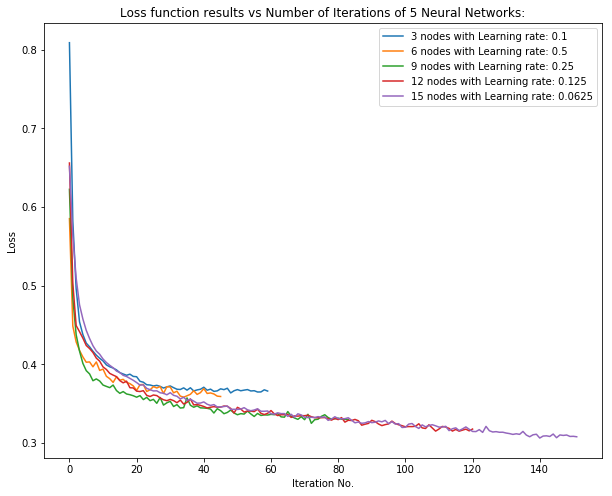

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

figure(figsize=(10,8))
for x in iresults:
        plt.plot(x.loss_curve_,label = str(x.hidden_layer_sizes) + " nodes with Learning rate: " + str(x.learning_rate_init))
        
xlabel('Iteration No.')
ylabel('Loss')
legend(loc=1)
plt.title('Loss function results vs Number of Iterations of 5 Neural Networks:')
    
plt.show()

Thus to confirm the best hyperparameters (Learning rate and size of Hidden layer), I made use of the built-in function called GridSearch which compares predefined parameters by training on data using the defined parameters and returns the best parameters to define a desired model.

In [49]:
from sklearn.model_selection import GridSearchCV

mlp2 = MLPClassifier(max_iter = 500)
parameters = {'hidden_layer_sizes':[3,6,9,12,15],'learning_rate_init':[0.1,0.5,0.25,0.125,0.0625], 'solver': ['sgd']}
grid = GridSearchCV(mlp2,parameters,n_jobs = -1)
grid.fit(X,y)

print('Based off GridSearch the most favorable hyperparameters would be ', grid.best_params_)

C:\Users\Food\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Based off GridSearch the most favorable hyperparameters would be  {'hidden_layer_sizes': 3, 'learning_rate_init': 0.125, 'solver': 'sgd'}


### OBTAINING THE CONFUSION MATRIX AND VISUALISING IT 

Now we will import our CV data and predict on it and compare the results for the 5 varying Neural Networks. 

Note the Confusion Matrix is printed in the format [[TN,FP],[FN,TP]]

If Negative is 1 and Positive is 0 then:

    True Negative: Represent a number of datasets that were actually = 0 and the Neural Network predicted = 0
    False Postive: Represent a number of datasets that were actually = 0 and the Neural Network predicted = 1
    False Negative: Represent a number of datasets that were actually = 1 and the Neural Network predicted = 0
    True Positive: Represent a number of datasets that were actually = 1 and the Neural Network predicted = 1


In [53]:
#Graph defined to draw the respective Confusion Matrices
def draw_graph(cm,ttl,acc): 
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title("\n\n"+ttl + str(round(acc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

Further definitions and the analysis of the confusion matrix of the chosen model will be found in the Testing notebook. Below I have printed a copy of the confusion matrices of the 5 classifiers. 


These are the Confusion Matrices for the Respective Neural Networks.



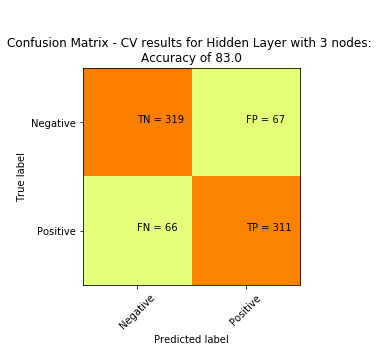


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       386
         1.0       0.82      0.82      0.82       377

   micro avg       0.83      0.83      0.83       763
   macro avg       0.83      0.83      0.83       763
weighted avg       0.83      0.83      0.83       763



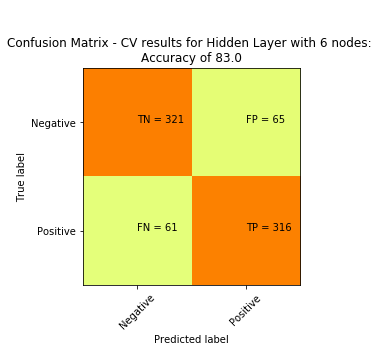


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       386
         1.0       0.83      0.84      0.83       377

   micro avg       0.83      0.83      0.83       763
   macro avg       0.83      0.83      0.83       763
weighted avg       0.83      0.83      0.83       763



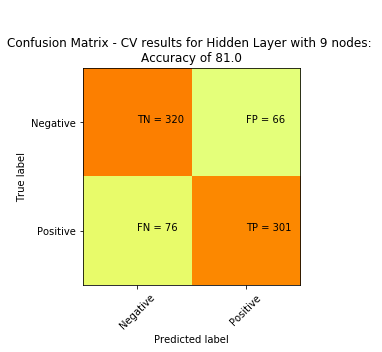


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       386
         1.0       0.82      0.80      0.81       377

   micro avg       0.81      0.81      0.81       763
   macro avg       0.81      0.81      0.81       763
weighted avg       0.81      0.81      0.81       763



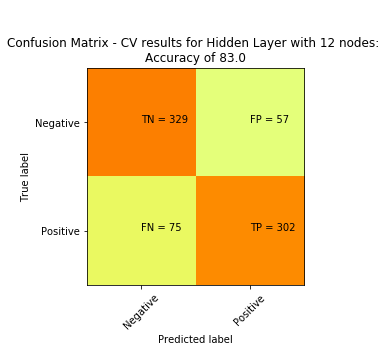


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       386
         1.0       0.84      0.80      0.82       377

   micro avg       0.83      0.83      0.83       763
   macro avg       0.83      0.83      0.83       763
weighted avg       0.83      0.83      0.83       763



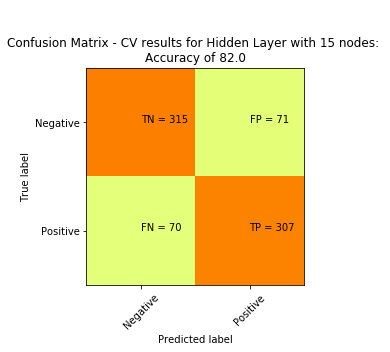


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       386
         1.0       0.81      0.81      0.81       377

   micro avg       0.82      0.82      0.82       763
   macro avg       0.82      0.82      0.82       763
weighted avg       0.82      0.82      0.82       763



In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

i = 0
accuracy = []
precision = []
recall = []
f1 = []
predictions1 = []
predict_prob = []
print("\nThese are the Confusion Matrices for the Respective Neural Networks.\n")

for x in iresults:
    predictions = x.predict(tX)
    pred = x.predict_proba(tX)
    cm = confusion_matrix(ty,predictions)
    cm1 = classification_report(ty,predictions)
    score = accuracy_score(ty,predictions)
    prec = precision_score(ty,predictions)
    rec = recall_score(ty,predictions)
    f1s = f1_score(ty,predictions)
    precision.append(round(prec)*100)
    recall.append(round(rec)*100)
    f1.append(round(f1s)*100)
    accuracy.append(round(score*100))
    ttl = 'Confusion Matrix - CV results for Hidden Layer with ' + str(x.hidden_layer_sizes) + ' nodes: \nAccuracy of '
    
    predictions1.append(predictions)
    predict_prob.append(pred)
    draw_graph(cm,ttl,score*100)
    
    print("\nBelow is the classification report for the Neural Network listed above: \n" + cm1)
    
plt.show()  

## Comparing CV Accuracies:

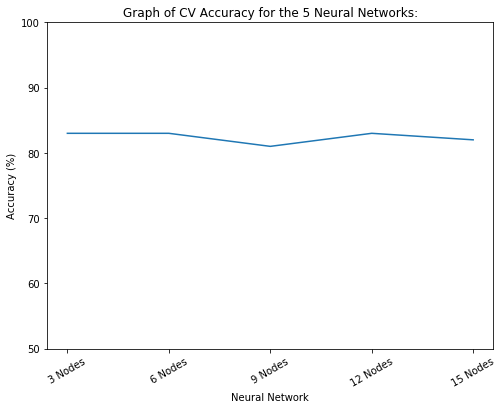

The chosen model is the model with the highest CV accuracy, in this case the chosen model is the model 
with 3 hidden nodes, with a  CV accuracy of 83.0%


In [57]:
from matplotlib import pyplot

figure(figsize=(8,6))
plt.ylim([50,100])
labels = ['3 Nodes','6 Nodes','9 Nodes','12 Nodes','15 Nodes']
index = np.arange(len(labels))
plt.plot(index,accuracy)

plt.title('Graph of CV Accuracy for the 5 Neural Networks:')
plt.xticks(index,labels, rotation = 30)
plt.xlabel('Neural Network')
plt.ylabel('Accuracy (%)')
plt.show()

maxAcc = np.amax(accuracy)
ind1 = np.where(accuracy == np.amax(accuracy))
ind =ind1[0]
ind = int(ind[0])

print("The chosen model is the model with the highest CV accuracy, in this case the chosen model is the model \nwith " + str((iresults[ind]).hidden_layer_sizes) +" hidden nodes, with a  CV accuracy of " + str(maxAcc) + "%")

### ROC Curve of chosen Neural Network

The accuracy of the classifier depends on how well the classifier identifies the customers who made a purchse (0) and those who did not (1). Accuracy is measured by the area under the ROC (Receiver Operating Characteristic) curve. An area of 1 represents a perfect test; an area of .5 represents a worthless classifier. 

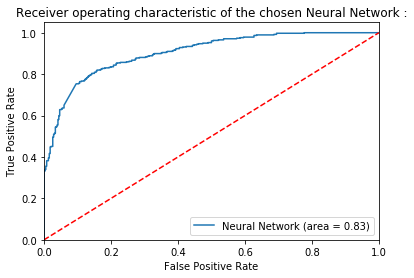

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure()
predictions = predictions1[ind]
pre = predict_prob[ind]
NN_roc_auc = roc_auc_score(ty,predictions)
fpr, tpr, thresholds = roc_curve(ty, pre[:,1])
plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % NN_roc_auc)
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of the chosen Neural Network :')
plt.legend(loc="lower right")
plt.show()

### Biblography:


- "The Evolution and Core Concepts of Deep Learning & Neural Networks", _Analytics Vidhya_, 7 Oct.2016,[Accesssed online 10 May 2019]
https://www.analyticsvidhya.com/blog/2016/08/evolution-core-concepts-deep-learning-neural-networks/



- Albon, Chris. "Tuning Neural Network Hyperparameters", _Chris Albon_ ,20 Dec. 2017, [Accesssed online 12 May 2019]
https://www.chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparamerters/


- Various SKLearn modules were obtained from https://scikit-learn.org